In [275]:
import warnings
warnings.filterwarnings('ignore')

In [276]:
import numpy as np
import os
import math
import shutil
import matplotlib.pyplot as plt
import glob

In [277]:
ROOT_DIR="BrainTumorData/Brain Tumor Data Set"
number_of_images={}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

In [278]:
number_of_images.items()

dict_items([('Brain Tumor', 8), ('Healthey', 7)])

In [279]:
len(os.listdir("BrainTumorData/Brain Tumor Data Set"))

2

In [280]:
def dataFolder(p,split):
    
    
    if not os.path.exists("./"+p):
        os.mkdir("./"+p)
        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./"+p+"/"+dir)
            for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                             size=(math.floor(split*number_of_images[dir])-2),replace=False):
                O=os.path.join(ROOT_DIR,dir,img)
                D=os.path.join("./"+p,dir)
                shutil.copy(O,D)
                os.remove(O)
    else:
        print("Folder Exist")

In [281]:
dataFolder("train",0.7)

Folder Exist


In [282]:
dataFolder("val",0.15)

Folder Exist


In [283]:
dataFolder("test",0.15)

Folder Exist


In [284]:
number_of_images={}

for dir in os.listdir(ROOT_DIR):
    number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
    

number_of_images.items()

dict_items([('Brain Tumor', 8), ('Healthey', 7)])

In [285]:
from keras.layers import Conv2D,MaxPool2D,Dropout,GlobalAveragePooling2D,Flatten,Dense,BatchNormalization
from keras.models import Sequential

import keras

In [286]:
model=Sequential()


model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))



model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))


model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 conv2d_37 (Conv2D)          (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 110, 110, 36)     0         
 g2D)                                                            
                                                                 
 conv2d_38 (Conv2D)          (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 52, 52, 128)      

In [287]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])

In [288]:
from keras.preprocessing.image import ImageDataGenerator

In [289]:
def preprocessingImages1(path):
    image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
    image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=16,class_mode='binary')
    return image

In [290]:
path="./train"
train_data=preprocessingImages1(path)

Found 167 images belonging to 2 classes.


In [291]:
def preprocessingImages2(path):
    image_data=ImageDataGenerator(rescale=1/255)
    image=image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=16,class_mode='binary')
    return image

In [292]:
path="./test"
test_data=preprocessingImages2(path)

Found 32 images belonging to 2 classes.


In [293]:
path="./val"
val_data=preprocessingImages2(path)

Found 32 images belonging to 2 classes.


In [294]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=3,verbose=1,mode="auto")
mc=ModelCheckpoint(monitor="val_accuracy",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')
cd=[es,mc]

In [297]:
hs=model.fit_generator(generator=train_data,
                       steps_per_epoch=8,
                       epochs=30,
                       verbose=1,
                       validation_data=val_data,
                       validation_steps=32,
                       callbacks=cd)

Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.5321 - accuracy: 0.7479WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 32 batches). You may need to use the repeat() function when building your dataset.



Epoch 1: val_accuracy did not improve from 0.75000
8/8 [==============================] - 9s 1s/step - loss: 0.5321 - accuracy: 0.7479 - val_loss: 0.7079 - val_accuracy: 0.7188
Epoch 2/30
8/8 [==============================] - ETA: 0s - loss: 0.5846 - accuracy: 0.7344WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 9s 1s/step - loss: 0.5846 - accuracy: 0.7344
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.5569 - accuracy: 0.7395WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 9s 1s/step - loss: 0.5569 - accuracy: 0.7395
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.5663 - accuracy: 0.7143WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 9s 1s/step - loss: 0.5663 - accuracy: 0.7143
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.5072 - accuracy: 0.7479WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 9s 1s/step - loss: 0.5072 - accuracy: 0.7479
Epoch 6/30
8/8 [==============================] - ETA: 0s - loss: 0.5562 - accuracy: 0.7563WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 9s 1s/step - loss: 0.5562 - accuracy: 0.7563
Epoch 7/30
8/8 [==============================] - ETA: 0s - loss: 0.5972 - accuracy: 0.6471WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 9s 1s/step - loss: 0.5972 - accuracy: 0.6471
Epoch 8/30
8/8 [==============================] - ETA: 0s - loss: 0.5093 - accuracy: 0.8125WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 1s/step - loss: 0.5093 - accuracy: 0.8125
Epoch 9/30
8/8 [==============================] - ETA: 0s - loss: 0.4866 - accuracy: 0.7815WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 1s/step - loss: 0.4866 - accuracy: 0.7815
Epoch 10/30
8/8 [==============================] - ETA: 0s - loss: 0.4441 - accuracy: 0.8235WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 976ms/step - loss: 0.4441 - accuracy: 0.8235
Epoch 11/30
8/8 [==============================] - ETA: 0s - loss: 0.5378 - accuracy: 0.7815WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 1s/step - loss: 0.5378 - accuracy: 0.7815
Epoch 12/30
8/8 [==============================] - ETA: 0s - loss: 0.4328 - accuracy: 0.7983WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 9s 1s/step - loss: 0.4328 - accuracy: 0.7983
Epoch 13/30
8/8 [==============================] - ETA: 0s - loss: 0.4481 - accuracy: 0.8067WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 10s 1s/step - loss: 0.4481 - accuracy: 0.8067
Epoch 14/30
8/8 [==============================] - ETA: 0s - loss: 0.4568 - accuracy: 0.8655WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 9s 1s/step - loss: 0.4568 - accuracy: 0.8655
Epoch 15/30
8/8 [==============================] - ETA: 0s - loss: 0.4660 - accuracy: 0.7563WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 9s 989ms/step - loss: 0.4660 - accuracy: 0.7563
Epoch 16/30
8/8 [==============================] - ETA: 0s - loss: 0.4968 - accuracy: 0.7395WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 1s/step - loss: 0.4968 - accuracy: 0.7395
Epoch 17/30
8/8 [==============================] - ETA: 0s - loss: 0.4115 - accuracy: 0.8067WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 976ms/step - loss: 0.4115 - accuracy: 0.8067
Epoch 18/30
8/8 [==============================] - ETA: 0s - loss: 0.4107 - accuracy: 0.7891WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 1s/step - loss: 0.4107 - accuracy: 0.7891
Epoch 19/30
8/8 [==============================] - ETA: 0s - loss: 0.3956 - accuracy: 0.8125WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 9s 1s/step - loss: 0.3956 - accuracy: 0.8125
Epoch 20/30
8/8 [==============================] - ETA: 0s - loss: 0.3711 - accuracy: 0.8235WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 965ms/step - loss: 0.3711 - accuracy: 0.8235
Epoch 21/30
8/8 [==============================] - ETA: 0s - loss: 0.3365 - accuracy: 0.8403WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 963ms/step - loss: 0.3365 - accuracy: 0.8403
Epoch 22/30
8/8 [==============================] - ETA: 0s - loss: 0.3762 - accuracy: 0.8571WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 958ms/step - loss: 0.3762 - accuracy: 0.8571
Epoch 23/30
8/8 [==============================] - ETA: 0s - loss: 0.4270 - accuracy: 0.8235WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 1s/step - loss: 0.4270 - accuracy: 0.8235
Epoch 24/30
8/8 [==============================] - ETA: 0s - loss: 0.3360 - accuracy: 0.8992WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 964ms/step - loss: 0.3360 - accuracy: 0.8992
Epoch 25/30
8/8 [==============================] - ETA: 0s - loss: 0.3584 - accuracy: 0.8235WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 961ms/step - loss: 0.3584 - accuracy: 0.8235
Epoch 26/30
8/8 [==============================] - ETA: 0s - loss: 0.3297 - accuracy: 0.8571WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 10s 1s/step - loss: 0.3297 - accuracy: 0.8571
Epoch 27/30
8/8 [==============================] - ETA: 0s - loss: 0.2669 - accuracy: 0.9244WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 940ms/step - loss: 0.2669 - accuracy: 0.9244
Epoch 28/30
8/8 [==============================] - ETA: 0s - loss: 0.2660 - accuracy: 0.8739WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 9s 1s/step - loss: 0.2660 - accuracy: 0.8739
Epoch 29/30
8/8 [==============================] - ETA: 0s - loss: 0.2100 - accuracy: 0.9297WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 9s 1s/step - loss: 0.2100 - accuracy: 0.9297
Epoch 30/30
8/8 [==============================] - ETA: 0s - loss: 0.2462 - accuracy: 0.8655WARNING:tensorflow:Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: loss,accuracy


8/8 [==============================] - 8s 939ms/step - loss: 0.2462 - accuracy: 0.8655


In [298]:
h=hs.history
h.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [299]:
import matplotlib.pyplot as plt

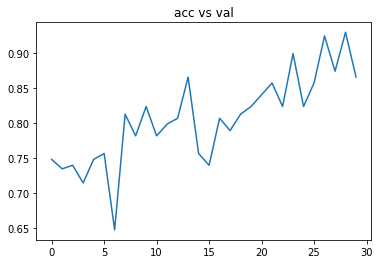

In [301]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])



plt.title("acc vs val")
plt.show()

In [302]:
from keras.models import load_model
model=load_model("bestmodel.hs")

OSError: No file or directory found at ./bestmodel.h5